### 1. SVM 모델 하이퍼파라미터 튜닝
- **Optuna를 사용해 SVM 모델의 하이퍼파라미터 최적화(C, gamma, kernel)**:
  - **C**: 이 파라미터는 SVM의 규제 매개변수로, 모델이 얼마나 데이터에 맞게끔 복잡해질지를 결정함. 작은 값은 단순한 모델을 만들어 과적합을 방지하지만, 값이 너무 작으면 과소적합이 발생할 수 있음.
  - **gamma**: 이 파라미터는 데이터의 영향 범위를 제어하는 역할을 함. 값이 크면 각 포인트의 영향이 좁아져 모델이 과적합되기 쉽고, 값이 작으면 모델이 더 단순해져 데이터의 복잡한 관계를 잘 포착하지 못할 수 있음.
  - **kernel**: 주로 **RBF(Radial Basis Function)** 커널을 사용하여 비선형 데이터의 복잡한 관계를 학습할 수 있음. 다양한 커널 중 RBF는 대부분의 경우에서 좋은 성능을 보임.
- **최적의 하이퍼파라미터로 SVM 모델을 학습**:
  - Optuna를 사용하여 최적의 하이퍼파라미터를 탐색하고, 그 파라미터를 이용해 최종적으로 모델을 학습함으로써 SVM의 성능을 최대화함.

### 2. Random Forest 모델 하이퍼파라미터 튜닝
- **Optuna를 사용해 RandomForest 모델의 하이퍼파라미터 최적화 (n_estimators, max_depth, min_samples_split)**:
  - **n_estimators**: RandomForest는 여러 개의 결정 트리를 앙상블하여 예측을 수행함. n_estimators는 생성할 트리의 수를 결정하며, 트리의 수가 많아질수록 일반적으로 모델의 안정성과 정확도가 향상되지만, 과적합을 초래할 수 있음.
  - **max_depth**: 각 트리의 최대 깊이를 제한하여 트리의 복잡도를 조절함. 깊이가 너무 크면 모델이 데이터를 과적합하게 되고, 깊이가 너무 낮으면 데이터의 중요한 패턴을 놓칠 수 있음.
  - **min_samples_split**: 노드를 분할하기 위해 필요한 최소 샘플 수임. 이 값이 커지면 트리의 가지가 덜 나뉘어 모델의 복잡도를 줄이고 과적합을 방지할 수 있음.
- **최적의 하이퍼파라미터로 RandomForest 모델 학습**:
  - 최적의 하이퍼파라미터로 RandomForest 모델을 학습하여, 데이터를 효과적으로 분류하는 데 기여함.

### 3. XGBoost 모델 학습
- **XGBoost 모델을 정의하고 학습하며 과적합 방지 (early_stopping_rounds 사용)**:
  - **XGBoost**는 부스팅 알고리즘을 사용해 성능을 극대화하는 모델임. 여러 개의 약한 학습기를 순차적으로 학습하여 오차를 줄여 나가는 방식으로, 매우 강력한 예측 성능을 제공함.
  - **early_stopping_rounds**: 학습 도중 검증 데이터의 성능이 개선되지 않으면 학습을 조기에 중단하여 과적합을 방지하는 역할을 함.
  - 학습 중 발생할 수 있는 오류를 예외 처리하여, 필요 시 early_stopping 없이도 학습을 계속 진행함으로써 모델이 학습을 완전히 수행할 수 있도록 함.

### 4. 스태킹 앙상블 모델 정의 및 학습
- **SVM, RandomForest, XGBoost 모델을 StackingClassifier로 앙상블**:
  - **스태킹 앙상블(Stacking)**은 서로 다른 여러 모델의 예측 결과를 하나의 메타 모델이 학습하는 방식임. 각 모델의 장점을 조합하여 최종적인 예측 성능을 최대화할 수 있음.
  - **GradientBoostingClassifier**를 최종 메타 모델로 사용하여 각 기본 모델의 출력을 입력으로 받아 최종적으로 예측함. GradientBoosting은 강력한 성능을 제공하며, 여러 기본 학습기의 결과를 종합해 더 좋은 예측을 할 수 있도록 해 줌.
  - **cv=3**을 사용해 3-폴드 교차 검증으로 앙상블 모델의 일반화 성능을 높임.

### 종합적인 이유
- **다양한 모델을 사용하여 강력한 예측 성능 확보**:
  - **SVM**은 데이터의 경계가 복잡한 경우에도 잘 대응할 수 있는 능력을 가짐.
  - **RandomForest**는 데이터를 랜덤하게 분리하고 여러 개의 트리를 학습하여 다양한 관점에서 예측을 수행함.
  - **XGBoost**는 부스팅 알고리즘을 통해 이전 모델의 오차를 줄이며 점점 더 좋은 예측을 만들어 냄.
- **스태킹 앙상블을 통해 다양한 모델의 장점 결합**:
  - 각 모델이 다르게 데이터를 처리하고 예측하므로, 스태킹을 통해 모든 모델의 장점을 결합하면 더 나은 일반화 성능을 기대할 수 있음. 최종 메타 모델로 **GradientBoostingClassifier**를 사용해 성능을 더욱 개선하고자 함.


In [1]:
import pandas as pd
import optuna  
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay)
import numpy as np
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pylab as plt
import seaborn as sns
import klib
from sklearn.model_selection import train_test_split

#ignore warningss
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 데이터 불러오기
df_trn = pd.read_csv('train.csv')
df_tst = pd.read_csv('test.csv')

In [3]:
# 칼럼 정의
important_features = ['alcohol', 'sulphates', 'volatile acidity', 'total sulfur dioxide', 'pH', 'density','chlorides']
id_cols = ['ID']
y_cols = ['label']
num_cols = [col for col in important_features if col in df_trn.columns]

# 파이프라인 정의 (StandardScaler를 사용하여 수치형 데이터 스케일링)
# 모델 학습을 위해 데이터의 분포를 맞추기 위해 StandardScaler를 사용하여 평균을 0, 표준 편차를 1로 맞춤
num_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # StandardScaler 사용
])

num_pipeline.set_output(transform='pandas')

# 컬럼 변환기 정의 (선정한 수치형 변수만 변환)
# 선정한 중요한 수치형 변수들에 대해 전처리를 수행하고 나머지 열들은 제거함

col_transformer = ColumnTransformer(
    [
        ('num', num_pipeline, num_cols),
    ],
    remainder='drop',
    verbose_feature_names_out=False,
)

col_transformer.set_output(transform='pandas')


ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['alcohol', 'sulphates', 'volatile acidity',
                                  'total sulfur dioxide', 'pH', 'density',
                                  'chlorides'])],
                  verbose_feature_names_out=False)

In [4]:
# 데이터 전처리 (컬럼 변환기 적용)
# 컬럼 변환기를 적용하여 데이터를 전처리함

col_transformer.fit(df_trn)

df_trn_x = col_transformer.transform(df_trn)
df_tst_x = col_transformer.transform(df_tst)

df_trn_y = df_trn[y_cols]


In [5]:
# 데이터를 훈련용과 검증용으로 분리 (8:2 비율)
# 학습 데이터를 훈련용과 검증용으로 분리하여 모델의 일반화 성능을 평가함

x_train, x_valid, y_train, y_valid = train_test_split(df_trn_x, df_trn_y, test_size=0.2, random_state=42)

In [6]:
# numpy 배열로 변환 (XGBoost 학습 시 사용)
# XGBoost 모델은 numpy 배열 형태의 데이터를 요구하므로 변환함

x_train_np = x_train.values
y_train_np = y_train.values.ravel()
x_valid_np = x_valid.values
y_valid_np = y_valid.values.ravel()


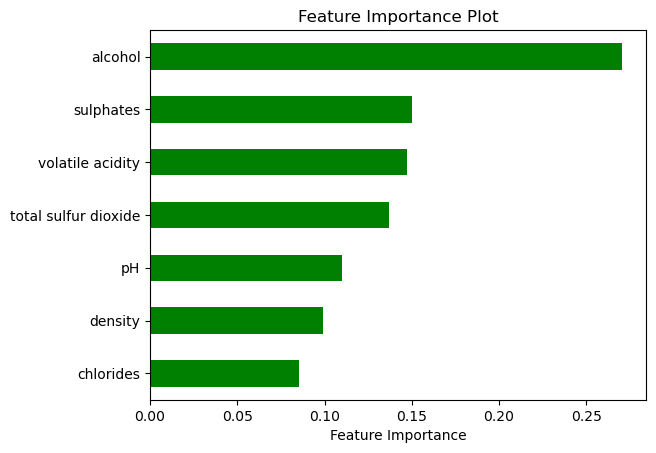

In [7]:
# tree model 기반의 feature importance
rf = RandomForestRegressor(random_state=42)
rf.fit(x_train_np, y_train_np)  # 정확히 선택된 피처 데이터로 학습
feature_importances = pd.Series(rf.feature_importances_, index= df_trn_x.columns)

# 피처 중요도 시각화
feature_importances.sort_values(ascending=True).plot(kind='barh', color='green')
plt.xlabel('Feature Importance')
plt.title('Feature Importance Plot')
plt.show()

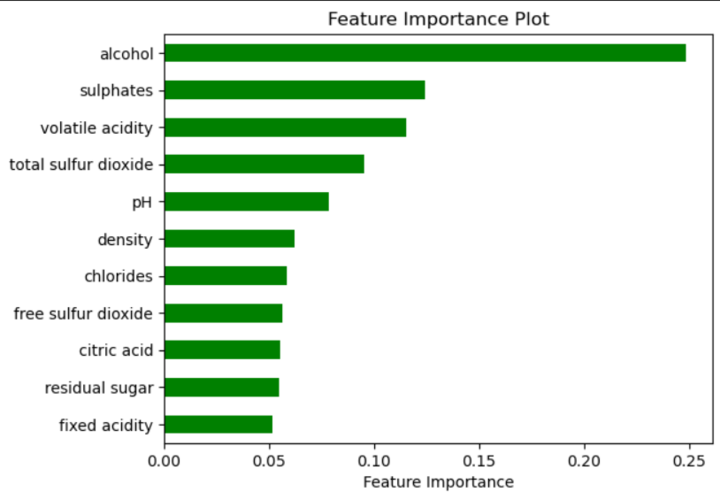

In [8]:
# Optuna를 사용한 하이퍼파라미터 최적화 (SVM)
# Optuna를 사용하여 SVM 모델의 최적의 하이퍼파라미터를 찾음

def objective_svm(trial):
    # SVM 하이퍼파라미터 탐색 공간 정의함
    C = trial.suggest_loguniform('C', 1e-3, 10)  # 모델 복잡도 제어를 위한 C 파라미터 (범위 좁혀 과적합 방지함)
    gamma = trial.suggest_categorical('gamma', ['scale', 'auto', 0.01, 0.1])  # 커널 함수의 gamma 파라미터 정의함
    kernel = trial.suggest_categorical('kernel', ['rbf'])  # RBF 커널 사용 (복잡한 비선형 관계 학습 가능함)

    model = SVC(probability=True, C=C, gamma=gamma, kernel=kernel)
    # 교차 검증을 통해 모델의 평균 성능을 평가함
    scores = cross_val_score(model, df_trn_x, df_trn_y.values.ravel(), cv=5, scoring='roc_auc')
    return np.mean(scores)


In [9]:
# Optuna 스터디 생성 및 최적화 수행 (SVM)
# AUC를 최대화하는 방향으로 탐색함

study_svm = optuna.create_study(direction='maximize')
study_svm.optimize(objective_svm, n_trials=20, timeout=600)  # 총 20번의 시도와 제한된 시간 내에서 탐색 수행함


[I 2024-11-07 17:39:28,415] A new study created in memory with name: no-name-ae9df1df-5214-4795-963b-31b28c5aa2f0
[I 2024-11-07 17:39:33,225] Trial 0 finished with value: 0.8070181534152123 and parameters: {'C': 0.01374562454589622, 'gamma': 'scale', 'kernel': 'rbf'}. Best is trial 0 with value: 0.8070181534152123.
[I 2024-11-07 17:39:37,232] Trial 1 finished with value: 0.8095207313694708 and parameters: {'C': 0.0017305549315685574, 'gamma': 0.1, 'kernel': 'rbf'}. Best is trial 1 with value: 0.8095207313694708.
[I 2024-11-07 17:39:41,301] Trial 2 finished with value: 0.8142791539692802 and parameters: {'C': 0.2720958883009547, 'gamma': 0.01, 'kernel': 'rbf'}. Best is trial 2 with value: 0.8142791539692802.
[I 2024-11-07 17:39:44,384] Trial 3 finished with value: 0.8284053813833226 and parameters: {'C': 0.7780944790235518, 'gamma': 'scale', 'kernel': 'rbf'}. Best is trial 3 with value: 0.8284053813833226.
[I 2024-11-07 17:39:47,348] Trial 4 finished with value: 0.8215779196293902 and p

In [10]:
# 최적의 하이퍼파라미터로 SVM 모델 학습
best_svc_params = study_svm.best_params
best_svc_model = SVC(probability=True, **best_svc_params)
best_svc_model.fit(df_trn_x, df_trn_y.values.ravel())

SVC(C=0.9425024784591404, gamma='auto', probability=True)

In [11]:
# Optuna를 사용한 하이퍼파라미터 최적화 (RandomForest)
# Optuna를 사용하여 RandomForest 모델의 최적의 하이퍼파라미터를 찾음

def objective_rf(trial):
    # RandomForest 하이퍼파라미터 탐색 공간 정의함
    n_estimators = trial.suggest_int('n_estimators', 50, 200)  # 트리의 개수를 정의함
    max_depth = trial.suggest_int('max_depth', 3, 20)  # 트리의 최대 깊이 (과적합 방지함)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 15)  # 노드를 분할하기 위한 최소 샘플 수 정의함

    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, random_state=42)
    # 교차 검증을 통해 모델의 평균 성능을 평가함
    scores = cross_val_score(model, df_trn_x, df_trn_y.values.ravel(), cv=5, scoring='roc_auc')
    return np.mean(scores)

# Optuna 스터디 생성 및 최적화 수행 (RandomForest)
# AUC를 최대화하는 방향으로 탐색함
study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective_rf, n_trials=20, timeout=600)

[I 2024-11-07 17:40:38,616] A new study created in memory with name: no-name-ad775539-1783-4652-9a40-42a06e158417


[I 2024-11-07 17:40:45,920] Trial 0 finished with value: 0.8625433634992458 and parameters: {'n_estimators': 174, 'max_depth': 17, 'min_samples_split': 7}. Best is trial 0 with value: 0.8625433634992458.
[I 2024-11-07 17:40:49,709] Trial 1 finished with value: 0.8543679202450211 and parameters: {'n_estimators': 113, 'max_depth': 16, 'min_samples_split': 14}. Best is trial 0 with value: 0.8625433634992458.
[I 2024-11-07 17:40:53,642] Trial 2 finished with value: 0.8277088335334135 and parameters: {'n_estimators': 124, 'max_depth': 4, 'min_samples_split': 10}. Best is trial 0 with value: 0.8625433634992458.
[I 2024-11-07 17:40:59,319] Trial 3 finished with value: 0.8540504278634531 and parameters: {'n_estimators': 145, 'max_depth': 8, 'min_samples_split': 2}. Best is trial 0 with value: 0.8625433634992458.
[I 2024-11-07 17:41:06,623] Trial 4 finished with value: 0.8524420729830393 and parameters: {'n_estimators': 189, 'max_depth': 13, 'min_samples_split': 15}. Best is trial 0 with value:

In [12]:
# 최적의 하이퍼파라미터로 RandomForest 모델 학습
best_rf_params = study_rf.best_params
best_rf_model = RandomForestClassifier(**best_rf_params, random_state=42)
best_rf_model.fit(df_trn_x, df_trn_y.values.ravel())

RandomForestClassifier(max_depth=20, n_estimators=190, random_state=42)

In [13]:
# XGBoost 모델 정의 및 학습
# XGBoost 모델을 정의하고 학습을 진행하며 early stopping을 사용해 과적합을 방지함

xgb_model = xgb.XGBClassifier(n_estimators=150, max_depth=7, learning_rate=0.03, random_state=42, use_label_encoder=False, eval_metric='logloss')
try:
    xgb_model.fit(x_train_np, y_train_np, early_stopping_rounds=10, eval_set=[(x_valid_np, y_valid_np)])
except TypeError as e:
    print(f"Warning: {e}. Proceeding without early stopping.")
    xgb_model.fit(x_train_np, y_train_np)

In [14]:
# 스태킹 앙상블 정의 (SVM, RandomForest, XGBoost)
#  SVM, RandomForest, XGBoost 모델을 앙상블하여 최종 메타 모델로 GradientBoostingClassifier를 사용함

estimators = [
    ('svc', best_svc_model),
    ('rf', best_rf_model),
    ('xgb', xgb_model)
]
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), cv=5)
stacking_clf.fit(df_trn_x, df_trn_y.values.ravel())

StackingClassifier(cv=5,
                   estimators=[('svc',
                                SVC(C=0.9425024784591404, gamma='auto',
                                    probability=True)),
                               ('rf',
                                RandomForestClassifier(max_depth=20,
                                                       n_estimators=190,
                                                       random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              en...
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=0.03, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=7,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=150, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=42, ...))],
                   final_estimator=LogisticRegression())

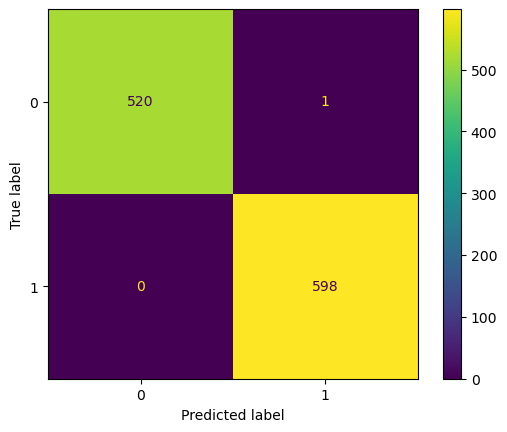

In [15]:
# 스태킹 모델 평가
y_trn_pred = stacking_clf.predict(df_trn_x)
y_trn_score = stacking_clf.predict_proba(df_trn_x)[:, 1]

# 혼동 행렬을 사용해 예측 결과를 시각화함
ConfusionMatrixDisplay.from_predictions(y_true=df_trn_y.values, 
                                        y_pred=y_trn_pred, 
                                        labels=[0, 1], 
                                        display_labels=[0, 1])

In [16]:
# train data에 적용했을 때, 성능 평가
# 정확도, 정밀도, 재현율, F1 점수, AUROC를 계산하고 출력함
trn_acc = accuracy_score(y_true=df_trn_y.values, y_pred=y_trn_pred)
trn_pre = precision_score(y_true=df_trn_y.values, y_pred=y_trn_pred, pos_label=1)
trn_rec = recall_score(y_true=df_trn_y.values, y_pred=y_trn_pred, pos_label=1)
trn_f1 = f1_score(y_true=df_trn_y.values, y_pred=y_trn_pred, pos_label=1)
trn_auroc = roc_auc_score(y_true=df_trn_y.values, y_score=y_trn_score)

print(f'In train set, accuracy={trn_acc:.4f}, precision={trn_pre:.4f}, recall={trn_rec:.4f}, f1={trn_f1:.4f}')
print(f'In train set, AUROC={trn_auroc:.4f}')

In train set, accuracy=0.9991, precision=0.9983, recall=1.0000, f1=0.9992
In train set, AUROC=1.0000


In [17]:
# 예측 결과를 submission에 넣고 저장하기
y_tst_pred = stacking_clf.predict(df_tst_x)
df_submission = pd.read_csv('submission_example.csv')
df_submission['label'] = y_tst_pred

# 새로운 파일로 저장하기
filename = '최종인가가5.csv'
df_submission.to_csv(filename, index=False)